# CS112 - R Competency
##### Leo Ware
##### September 18, 2020

*NB: Each graph is followed by a few italic sentences describing the association portrayed as well as it's relevance. They should be taken as part of the graphs, not associated with nearby text.*

In [1]:
# Step 1: Read in the data
data = read.csv("data.csv")

In [3]:
# Step 2: Omit rows with missing values
na.omit(data)

# Step 3: Read date values as dates
data$Last_Reporting_Date <- as.Date(data$Last_Reporting_Date, format="%d/%m/%Y")

,Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<date>
1,427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,2020-07-31
2,427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,2020-07-31
3,427905,ARG,32,Argentina,UNFICYP,Troops,15,219,2020-07-31
4,427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,2020-07-31
5,427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,2020-07-31
6,427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,2020-07-31
7,427909,ARG,32,Argentina,UNVMC,Individual Police,5,7,2020-07-31
8,427910,ARM,51,Armenia,MINUSMA,Staff Officer,0,1,2020-07-31
9,427911,ARM,51,Armenia,UNIFIL,Troops,2,30,2020-07-31


In [4]:
# Step 4: Did the UN meet its diversity goal for fomed police units in July?

formed_police_units = subset(data, data$Personnel_Type=="Formed Police Units")

percent_women_police = function(date_start, date_stop){
    data = subset(formed_police_units,
                 formed_police_units$Last_Reporting_Date >= as.Date(date_start) &
                 formed_police_units$Last_Reporting_Date <= as.Date(date_stop))

    women = sum(data$Female_Personnel)
    if (women == 0){
        return(0)
    }
    
    men = sum(data$Male_Personnel)
    return(women/(women+men))
}

percent_women_police("2020/07/01", "2020/07/31")

[1] 0.109292

No, the UN did not meet its 2028 diversity goal for formed police units in July. Their goal was 20%, and they only had 10.9% as shown output above.

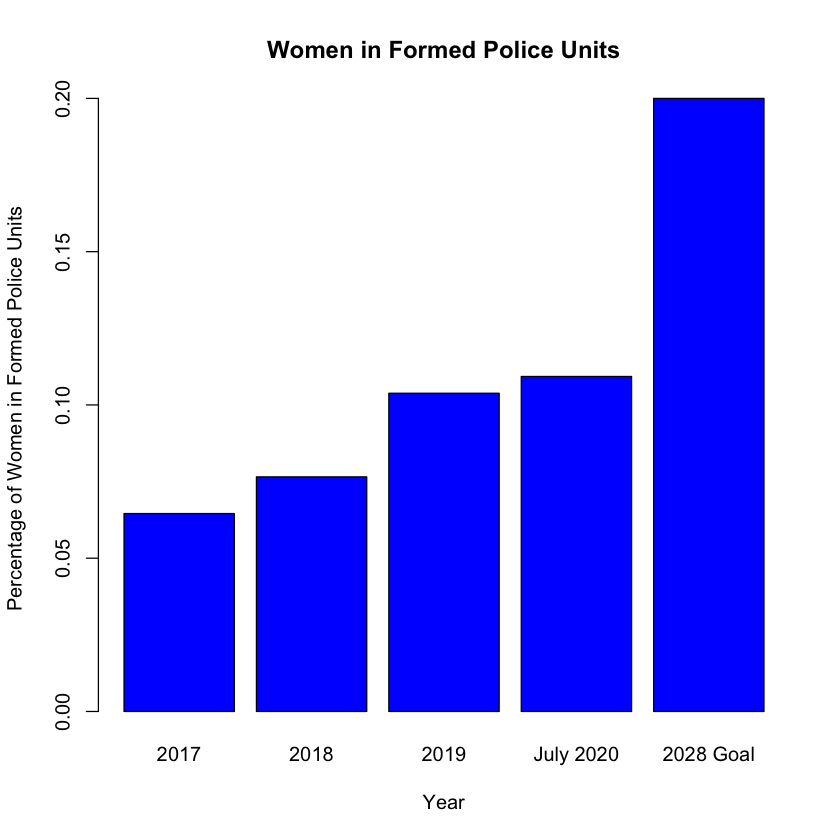

In [5]:
# Step 5: Plotting

bars = c(
    percent_women_police("2017/01/01", "2017/12/31"),
    percent_women_police("2018/01/01", "2018/12/31"),
    percent_women_police("2019/01/01", "2019/12/31"),
    percent_women_police("2020/07/01", "2020/07/31"),
    0.2
)

names = c(
    "2017",
    "2018",
    "2019",
    "July 2020",
    "2028 Goal"
)

barplot(bars,
        main="Women in Formed Police Units",
        ylab="Percentage of Women in Formed Police Units",
        xlab="Year",
        names=names,
        col='blue')

*This bar plot shows the percentage of women in formed police units in UN missions in the dataset. Although the numbers are improving, they are not close to the 2028 goal. Notice the nonlinear x-axis.*

In [6]:
# Step 6: Countries from the Rotation

missions_for_country = function(country_code){
    
    # this line subsets the primary data frame to find only missions from the country
    country_missions = subset(data, data$ISOCode3==country_code)$Mission_Acronym
    
    # this line removes whitespace and get the unique missions
    # removing whitespace ensures that trailing spaces won;t result in doubles
    country_missions_unique = unique(lapply(country_missions, trimws))
    
    # print country code and number of missions
    cat(country_code, fill=TRUE)
    cat(length(country_missions_unique), fill=TRUE)
    
    # iterate over missions and print
    # this is the prettiest low-effort way I found to print them
    for (val in country_missions_unique){
        cat(val)
        cat(", ")
    }
    
    # newline for readability
    cat("\n\n")
}

In [21]:
countries_iso = c("USA", "KOR", "IND", "DEU", "ARG", "GBR")
for (val in countries_iso){
    missions_for_country(val)
}

USA
23
BINUH, MINUSCA, MINUSMA, MONUSCO, UNMISS, UNSMIL, UNTSO, MINUJUSTH, UNMIL, MINUSTAH, UNAMA, MINURCAT, UNMIS, UNMIK, UNIOSIL, UNAMID, UNMIT, UNOTIL, UNAMSIL, UNMISET, UNIKOM, UNMEE, UNMIBH, 

KOR
17
MINURSO, UNAMID, UNIFIL, UNMISS, UNMOGIP, UNMHA, MINUJUSTH, UNMIL, UNOCI, MINUSTAH, UNMIT, UNISFA, UNMIS, UNMIN, UNAMA, UNMISET, UNFICYP, 

IND
26
MINURSO, MONUSCO, UNDOF, UNFICYP, UNIFIL, UNISFA, UNMISS, UNTSO, UNSOM, MINUJUSTH, MINUSTAH, UNMIL, UNAMA, UNOCI, UNAMI, UNMIT, UNMIS, MONUC, UNMIK, UNIOSIL, UNMEE, ONUB, UNOMIG, UNAMSIL, UNIKOM, UNMIBH, 

DEU
18
MINURSO, MINUSMA, UNAMID, UNIFIL, UNMIK, UNMISS, UNSOM, UNMHA, MINUJUSTH, UNSMIL, UNMIL, UNAMA, MINUSTAH, UNMIS, UNOMIG, UNAMSIL, UNIKOM, UNMIBH, 

ARG
19
MINURSO, UNFICYP, UNMISS, UNTSO, UNVMC, MINUSCA, MINUJUSTH, UNAMI, MINUSTAH, UNMC, UNOCI, UNMIL, UNMIS, MONUC, UNMIK, UNMISET, UNIKOM, UNIMOG, UNMIBH, 

GBR
24
MINUSMA, UNAMA, UNFICYP, UNMISS, UNSMIL, UNSOM, UNSOS, MONUSCO, UNVMC, UNMC, UNMIL, MINUSTAH, UNAMI, UNISFA, UNMIS, MONU

In [8]:
# sum male and female personnel
data$personnel = data$Male_Personnel + data$Female_Personnel

# subset and aggregate
data_MINUSMA = subset(data, Mission_Acronym=="MINUSMA")
agg_data = aggregate(personnel ~ Last_Reporting_Date, data_MINUSMA, sum)

In [9]:
# summary statistics on aggregated data
cat("Mean", mean(agg_data$personnel), fill=TRUE)
cat("Median", median(agg_data$personnel), fill=TRUE)

quantiles = quantile(agg_data$personnel)
cat("Min", quantiles[1], fill=TRUE)
cat("25th percentile", quantiles[2], fill=TRUE)
cat("75th percentile", quantiles[4] , fill=TRUE)
cat("Max", quantiles[5], fill=TRUE)

Mean 11768.85
Median 12039.5
Min 5872
25th percentile 10125.25
75th percentile 13882
Max 14871


In [26]:
# Optional Challenge

In [35]:
# read gpd data from dataset
gdp_data = read.csv('gdp_data.csv')
gdp_data$GDP = gdp_data$GDP.per.capita..int......constant.2011.international...
gdp_data_2017 = subset(gdp_data, gdp_data$Year==2017)

In [113]:
# assemble list of all countries for looping
all_countries_iso = unique(data$ISOCode3)[1:147]

In [100]:
# get the 2017 gdp for each country and put it in a vector
countries_gdp = c()
counter = 1
for (country in all_countries_iso){
    
    # there a lots of gaps in the 2017 gdp data, so I hardcoded them
    if (country == "DJI"){
        countries_gdp[counter] = 2931
    } else if (country == "CUB"){
        countries_gdp[counter] = 8541
    } else if (country == "YEM"){
        countries_gdp[counter] = 964
    } else if (country == "BDS"){
        countries_gdp[counter] = 17432
    } else {
        # all countries that aren't hardcoded access the dataframe
        countries_gdp[counter] = subset(gdp_data_2017, gdp_data_2017$Code==country)$GDP
    }
    counter = counter + 1
}

In [101]:
# get the Dec 2017 troop contributions for each country
countries_troops = c()
counter = 1
for (country in all_countries_iso){
    # note efficient vector construction with counters
    
    countries_troops[counter] = sum(subset(
        data,
        data$ISOCode3==country &
        data$Last_Reporting_Date <= as.Date("2017/12/31") &
        data$Last_Reporting_Date >= as.Date("2017/12/01")
    )$personnel)
    
    counter = counter + 1
}

In [102]:
#assemble the dataframe
people_vs_purchase = data.frame(all_countries_iso, countries_gdp, countries_troops)

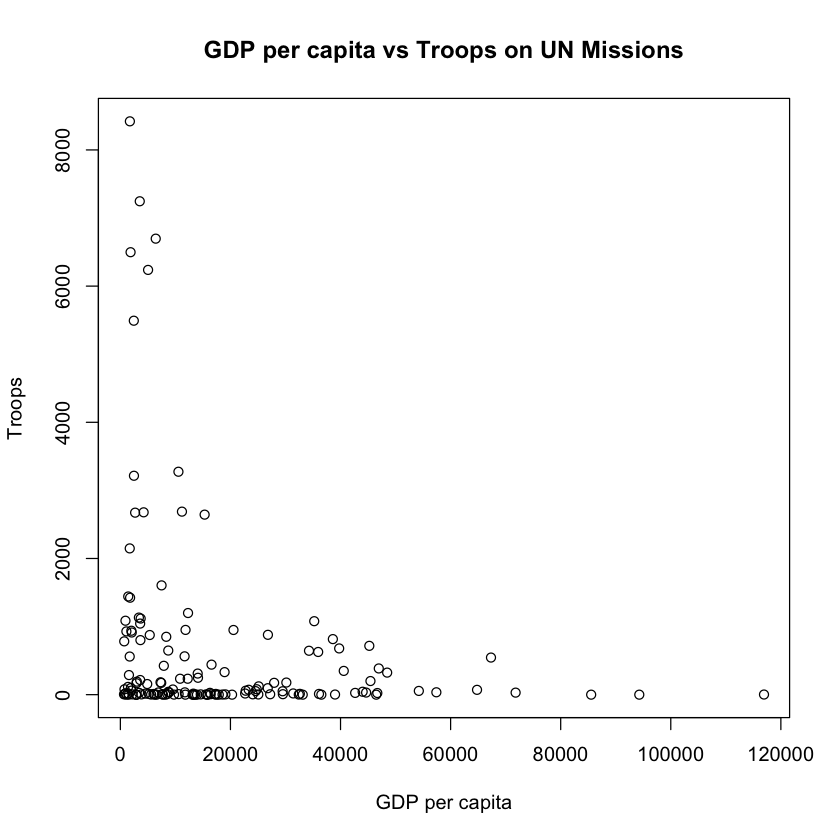

In [104]:
# mandatory scatterplot
plot(
    people_vs_purchase$countries_gdp,
    people_vs_purchase$countries_troops,
    main="GDP per capita vs Troops on UN Missions",
    xlab="GDP per capita",
    ylab="Troops"
)

*There does appear to be an association between the variables, but it is far from linear. Judging from the high number of low-troop, low-gdp countries and the strong inverse correlation, we are probably dealing with a log-linear relationship.*


The instructions for this assignment recommend a linear regression here, but frankly, that seems like a really bad model for this data. It doesn't look linear at all, and I think a linear regression would probably just be misleading.

Instead, I will try logging the data and fitting an (implicit) powerlaw model. Just eyeballing it, the data looks log-linear. So, I expect this to yield good results.

In [ ]:
pvp = people_vs_purchase # for quality of life

In [120]:
# getting log data
pvp$log_gdp = log(pvp$countries_gdp)
pvp$log_troops = log(pvp$countries_troops)

# purge -infs
counter = 1
for (num in pvp$log_troops){
    if (num == '-Inf'){
        pvp$log_troops[counter] = 0
    }
    counter = counter + 1
}

I thought about removing the countries with zero troop contributions in December 2017, because their inclusion in the dataset feels a little arbitrary. After all, all they did to get in the list of countries I have is to contribute troops at some point, possibly years or decades before or after December 2017.

However, I decided to include them on second thought though because zero is totally a valid troop contribution, and I didn't to exclude many valid datapoints just because a few might not quite capture what I am trying to measure. So, I wanted to make it clear that the reference population for this statistic is the population of countries who have sent troops on a UN mission at some time.

In [125]:
# perform regression

log_troops_from_log_gdp_nonzero = lm(log_troops ~ log_gdp, data=pvp_nonzero_troops)
log_troops_from_log_gdp_nonzero


Call:
lm(formula = log_troops ~ log_gdp, data = pvp)

Coefficients:
(Intercept)      log_gdp  
     8.4932      -0.4983  


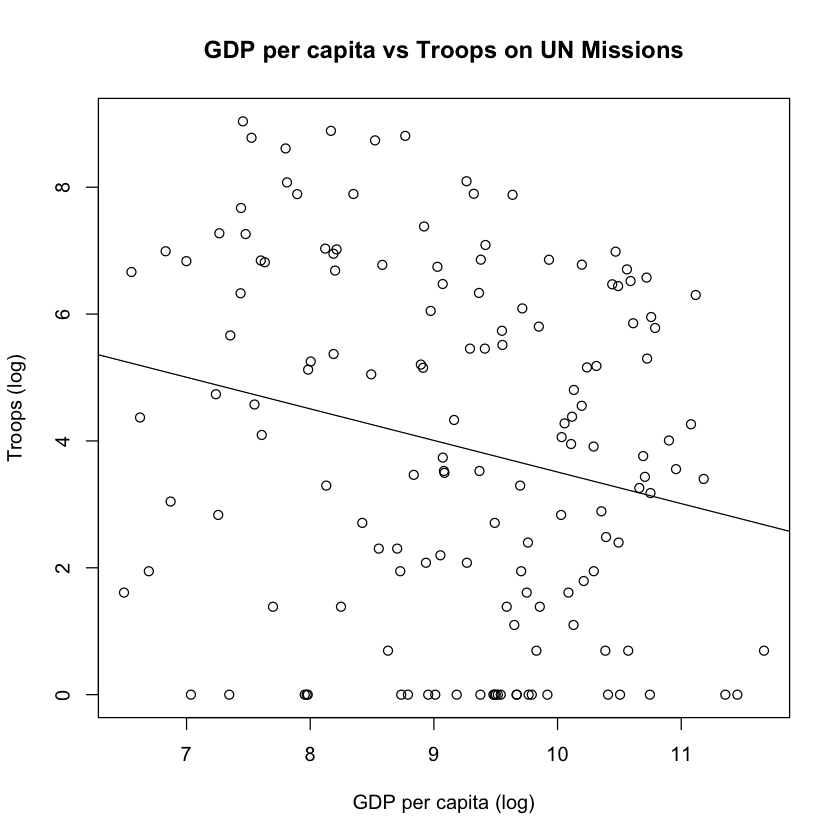

In [133]:
# Another scatterplot

# log data and titles
plot(
    pvp$log_gdp,
    pvp$log_troops,
    main="GDP per capita vs Troops on UN Missions",
    xlab="GDP per capita (log)",
    ylab="Troops (log)"
)

# regression result
abline(log_troops_from_log_gdp)

*A plot showing the relationship between log GDP per capita and log troop contributions. The line shown is a linear regression for log Troops given log GDP per capita. Interestingly, the data appear almost uncorrelated, although it looks like they have a slight inverse relationship.*

The scatter plot appears more linear here, and the line looks like a not unreasonable fit for the data. So, I am content with this model.

The only thing that still worries me is the countries with zero troop contributions still appear distinct from the rest of the distribution. If I were going to dive deeper with this, I might try to first fit a logistic regression model to predict whether a contry's contribution would be zero. Then, I could fit a linear model on the remaining (log) data to predict troops from GDP given nonzero contribution.

If I were actually trying to solve a prediction problem, I would compare all of these options with cross validation and pick the best.